In [1]:
import os # importing OS library
from email.parser import Parser
import matplotlib.pyplot as plt
import math
from glob import glob
import multiprocessing
import matplotlib.pyplot as plt
import itertools 
import operator # importing operator
from collections import Counter  # importing counter
import csv # importing csv
import email.utils
import time
import datetime

In [2]:
rootDir = os.path.dirname(os.path.realpath('__file__'))

In [3]:
## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    email_list = []
    if line:
        line = line.replace("\n", "")
        line = line.replace("\t", "")
        line = line.replace(" ", "")

        line = line.split(",")

        for email_to_1 in line:
            email_list.append(email_to_1)
    else:
        email_list = None
    return email_list

In [4]:
def email_analyse(filename, listOfEmails):
    with open(filename, "r") as f:
        data = f.read()
        em = Parser().parsestr(data)
        email_header = {}
        email_header['file'] =  filename.split('/')[-2:]
        email_header['content'] = get_text_from_email(em)
        for key in em.keys():
            email_header[key] = em.get(key)
        if em.get('Date'):
            email_header['Date'] = email.utils.parsedate(email_header['Date'])
        if em.get('To'):
            email_header['To'] = split_email_addresses(email_header['To'])
        if em.get('From'):
            email_header['From'] = split_email_addresses(email_header['From'])
        if em.get('Bcc'):
            email_header['Bcc'] = split_email_addresses(email_header['Bcc'])
        if em.get('Cc'):
            email_header['Cc'] = split_email_addresses(email_header['Cc'])
        if em.get('X-To'):
            email_header['X-To'] = split_email_addresses(email_header['X-To'])
        email_header['user'] =  filename.split('/')[-2]
        listOfEmails.append(email_header)

In [5]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

In [6]:
def get_listof_useremails(listOfEmails, path):
    include = ['sent', 'sent_items']
    [[email_analyse(os.path.join(directory, filename), listOfEmails) for filename in filenames] for directory, subdirectory, filenames in  os.walk(path) if directory.split('/')[-1] in include]

In [7]:
users = get_immediate_subdirectories(rootDir+'/data/enron/maildir/')

In [8]:
listOfEmails = []
if __name__ == '__main__':
    jobs = []
    for user in users :
        path = rootDir+'/data/enron/maildir/'+user+'/'
        p = multiprocessing.Process(target=get_listof_useremails(listOfEmails, path))
        jobs.append(p)
        p.start()

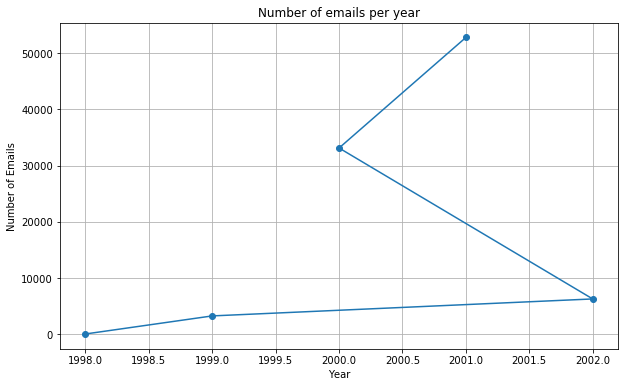

In [9]:
listOfYear = [em.get('Date')[0] for em in listOfEmails if em.get('Date')]
sortedDict = sorted(dict(Counter(listOfYear)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value

y = [count for year, count in sortedDict]
x = [year for year, count in sortedDict]

plt.figure(figsize=(10, 6))
plt.plot(x, y,'-o')
plt.ylabel('Number of Emails')
plt.xlabel('Year')
plt.title('Number of emails per year')
plt.grid(True)
plt.show()

In [10]:
def getDay(inputstr):
    month, day, year = inputstr[1], inputstr[2], inputstr[0]
    ans = datetime.date(year, month, day)
    return ans.strftime("%u")    # the day_name is Monday here

In [11]:
listOfDays = [getDay(em.get('Date')) for em in listOfEmails if em.get('Date')]
sortedDict = sorted(dict(Counter(listOfDays)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by

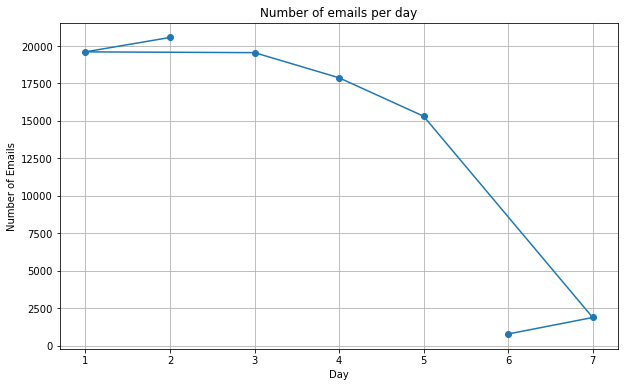

In [12]:
y = [count for year, count in sortedDict]
x = [year for year, count in sortedDict]
plt.figure(figsize=(10, 6))
plt.plot(x, y,'-o')
#plt.title('Number of Sent emails v/s Year')
plt.ylabel('Number of Emails')
plt.xlabel('Day')
plt.title('Number of emails per day')
plt.grid(True)
# plt.figure(figsize=(4,3))
plt.show()

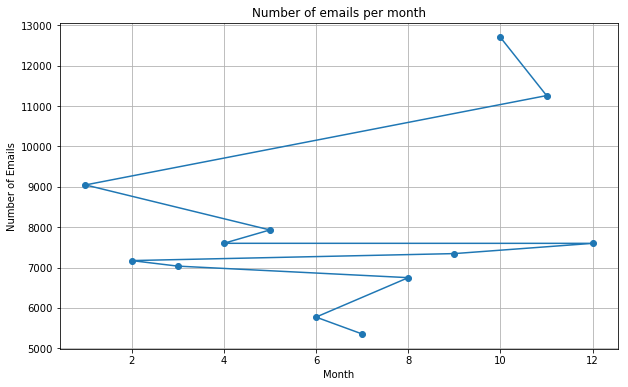

In [13]:
listOfMonth = [em.get('Date')[1] for em in listOfEmails if em.get('Date')]
sortedDict = sorted(dict(Counter(listOfMonth)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value

y = [count for year, count in sortedDict]
x = [year for year, count in sortedDict]

plt.figure(figsize=(10, 6))
plt.plot(x, y,'-o')
plt.ylabel('Number of Emails')
plt.xlabel('Month')
plt.title('Number of emails per month')
plt.grid(True)
plt.show()